# Análise Exploratória

# Tema

Análise do perfil de interesses cinematográficos da comunidade curitibana de usuários da rede social Letterbox, a partir das características descritivas dos filmes e do desempenho em avaliações. Ainda, pretende-se comparar as preferências de filmes da rede local com as preferências de filmes da comunidade global. Complementando essa análise, com base em dados externos a Letterbox, busca-se traçar o impacto de premiações de filmes em cerimônias de cinema nas avaliações dos filmes das comunidades local e global do Letterbox.

Título: Letterboxcd

# Equipe

Os membros da equipe são:
* Bernardo Vendruscolo Mendes
    * RA: 2355779
    * Gitlab: berWoW
* Daniel Pires de Castro
    * RA: 2240246
    * Gitlab: daniapc

# Obtenção e processamento de dados

A obtenção dos dados se deu em duas etapas por meio de mineração de perfis do Letterboxd. Para a primeira etapa, explorou-se a rede de usuários, em busca de perfis de Curitiba. Na prática, iniciou-se a busca a partir de uma seleção de perfis de Curitiba, explorando as amizades de cada perfil à procura de novos usuários de Curitiba. No total, foram encontrados entorno de 1000 usuários de Curitiba. Já para a segunda etapa, a partir da lista de perfis de Curitiba, obteve-se os filmes assistidos por cada usuário, assim como estatística relacionadas ao filme. Até o momento, os filmes de apenas 300 perfis foram obtidos, razão pela qual o presente relatório realiza análise em apenas parte dos dados. Ao final, implementou-se um algoritmo para unir as listas de filmes de cada perfil. Além das estatísticas de cada filme que são fornecidas pelo Letterboxd, o algoritmo calcula a quantidade de pessoas de Curitiba que assistiram e avaliaram o filme, assim como a avaliação média dentre os usuários de Curitiba.
O algoritmo para concatenação das listas de filmes está na pasta da primeira entrega em "/01 - Escolha do tema/mineracao_dados/Letterboxd-list-scraper/concatenate_data.ipynb". Segue-se uma cópia do código. No entanto, para executar o algoritmo é necessário executar o arquivo original na pasta da entrega 1.

In [1]:
import pandas as pd
import os

%matplotlib inline

df_res = pd.DataFrame()

movies = {}

for name in os.listdir('scraper_outputs'):
    if name.endswith('.csv'):
        df_tmp = pd.read_csv(f'scraper_outputs/{name}')
        for index, row in df_tmp.iterrows():
            if row['Film_title'] in movies:
                df_res.loc[movies[row['Film_title']], 'Curitiba_watches'] += 1
                if not pd.isna(row['Owner_rating']):
                    if pd.isna(df_res.loc[movies[row['Film_title']], 'Curitiba_average_rating']):
                        df_res.loc[movies[row['Film_title']], 'Curitiba_average_rating'] = row['Owner_rating']
                        df_res.loc[movies[row['Film_title']], 'Curitiba_ratings'] = 1
                    else:
                        df_res.loc[movies[row['Film_title']], 'Curitiba_average_rating'] += row['Owner_rating']
                        df_res.loc[movies[row['Film_title']], 'Curitiba_ratings'] += 1
            else:
                movies[row['Film_title']] = len(movies)
                df_row = pd.DataFrame(row).transpose()
                
                df_row.rename(columns = {'Owner_rating': 'Curitiba_average_rating'}, inplace = True)
                df_row.insert(27, 'Curitiba_ratings', 1 if not pd.isna(row['Owner_rating']) else 0)
                df_row.insert(13, 'Curitiba_watches', 1)
                df_row.insert(0, 'Index', movies[row['Film_title']])
                df_row.set_index('Index', inplace = True)
                
                df_res = pd.concat([df_res, df_row])
                
for index, row in df_res.iterrows():
    if row['Curitiba_ratings'] != 0:
        df_res.loc[index, 'Curitiba_average_rating'] = row['Curitiba_average_rating'] / row['Curitiba_ratings']

df_res.to_csv('../../../data/letterboxd_Curitiba.csv', index=False)

df_res

FileNotFoundError: [Errno 2] No such file or directory: 'scraper_outputs'

O algoritmo de concatenação gera um arquivo unificado com a lista de filmes. Para visualizar os dados, exibe-se 10 linhas do data frame.

In [3]:
import pandas as pd

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../../data/letterboxd_Curitiba.csv')

# Visualização de algumas linhas de dados
df.head(10)

Film_title  Release_year                   Director  \
0                     Aqui e Agora        2024.0             Vinícius Dórea   
1                    Junho de 2002        2024.0                 Tainá Lima   
2                         Mergulho        2023.0   Breno Silva, Wilson Neto   
3                       Sétimo Dia        2023.0  Vinícius Dórea, João Ives   
4                          Maestro        2023.0             Bradley Cooper   
5            The Boy and the Heron        2023.0             Hayao Miyazaki   
6                     Perfect Days        2023.0                Wim Wenders   
7                    Fallen Leaves        2023.0             Aki Kaurismäki   
8  Cadê o Mamulengo Que Tava Aqui?        2023.0             Antônio Rafael   
9              A Brighter Tomorrow        2023.0              Nanni Moretti   

                                                Cast  Average_rating  \
0  ['Andrey Icaro', 'Letícia Silva', 'Vivian Evel...             NaN   
1                                                NaN             NaN   
2  ['Benício Júnior', 'Pedro Bagano', 'Lívia Mari...             NaN   
3  ['Ligia Borges', 'Raianny Ferreira', 'Vivian E...             NaN   
4  ['Carey Mulligan', 'Bradley Cooper', 'Matt Bom...            3.15   
5  ['Soma Santoki', 'Masaki Suda', 'Ko Shibasaki'...            3.96   
6  ['Koji Yakusho', 'Tokio Emoto', 'Arisa Nakano'...            4.26   
7  ['Alma Pöysti', 'Jussi Vatanen', 'Janne Hyytiä...            3.80   
8  ['Antônio Rafael', 'Augusto Barreto', 'Marlene...             NaN   
9  ['Nanni Moretti', 'Margherita Buy', 'Silvio Or...            3.48   

   Curitiba_average_rating                                 Genres  Runtime  \
0                      NaN                        ['Documentary']      6.0   
1                      NaN                                    NaN      9.0   
2                      NaN                          ['Adventure']     24.0   
3                      NaN                              ['Drama']     22.0   
4                 3.078125          ['Drama', 'Music', 'Romance']    129.0   
5                 4.304348  ['Animation', 'Adventure', 'Fantasy']    124.0   
6                 4.375000                              ['Drama']    124.0   
7                 3.952381         ['Romance', 'Drama', 'Comedy']     81.0   
8                      NaN              ['Documentary', 'Comedy']     20.0   
9                 4.250000                             ['Comedy']     96.0   

                Countries Original_language  ...       ★★      ★★½      ★★★  \
0              ['Brazil']        Portuguese  ...      0.0      0.0      0.0   
1  ['Brazil', 'Portugal']        Portuguese  ...      0.0      0.0      0.0   
2              ['Brazil']        Portuguese  ...      0.0      0.0      0.0   
3              ['Brazil']        Portuguese  ...      0.0      0.0      0.0   
4                 ['USA']           English  ...  27135.0  35923.0  72809.0   
5               ['Japan']          Japanese  ...  10220.0  15586.0  63195.0   
6    ['Germany', 'Japan']          Japanese  ...   2535.0   3596.0  14446.0   
7  ['Finland', 'Germany']           Finnish  ...   3007.0   4791.0  17682.0   
8              ['Brazil']        Portuguese  ...      0.0      2.0      1.0   
9     ['France', 'Italy']           Italian  ...    813.0   1059.0   2992.0   

      ★★★½      ★★★★    ★★★★½     ★★★★★  Total_ratings  Curitiba_ratings  \
0      0.0       1.0      1.0       9.0             11                 0   
1      0.0       0.0      0.0       2.0              3                 0   
2      2.0       0.0      0.0      13.0             15                 0   
3      2.0       2.0      0.0       7.0             11                 0   
4  57638.0   48721.0  13207.0   10288.0         279563                32   
5  92817.0  190242.0  98546.0  103822.0         578606                46   
6  27504.0   79145.0  55889.0   71203.0         255762                44   
7  29009.0   46508.0  14

# Cobertura e distribuição dos dados

A partir do método `describe` verifica-se estatísticas gerais sobre as variáveis numéricas. Em especial, observa-se a mediana da avaliação média de filmes e a média desse dado.

In [6]:
df.describe()

Release_year  Average_rating  Curitiba_average_rating       Runtime  \
count  15804.000000    14930.000000             13013.000000  15722.000000   
mean    2002.722349        3.271516                 3.353415     98.408154   
std       20.997738        0.572561                 0.963114     65.924356   
min     1874.000000        0.880000                 0.500000      1.000000   
25%     1995.000000        2.900000                 2.864865     84.000000   
50%     2010.000000        3.340000                 3.500000     97.000000   
75%     2017.000000        3.680000                 4.000000    112.000000   
max     2024.000000        4.690000                 5.000000    990.000000   

            Watches  Curitiba_watches  List_appearances         Likes  \
count  1.583800e+04      15838.000000      15838.000000  1.583800e+04   
mean   1.026143e+05          8.061119      16327.562255  2.470754e+04   
std    2.883413e+05         18.519986      37143.276461  9.299276e+04   
min    3.000000e+00          1.000000          0.000000  0.000000e+00   
25%    3.535250e+03          1.000000       1064.000000  5.420000e+02   
50%    1.648150e+04          2.000000       4127.500000  2.780000e+03   
75%    6.604175e+04          6.000000      14166.500000  1.171750e+04   
max    3.737471e+06        212.000000     514170.000000  2.143647e+06   

                Fans             ½  ...            ★½             ★★  \
count   15838.000000  15804.000000  ...  15804.000000   15804.000000   
mean      769.511491    653.554037  ...   1181.376487    3797.216527   
std      4926.663026   2620.937097  ...   3217.274237    9734.840246   
min         0.000000      0.000000  ...      0.000000       0.000000   
25%         2.000000     13.000000  ...     33.000000     117.000000   
50%        18.000000     72.000000  ...    183.000000     628.000000   
75%       136.000000    350.000000  ...    878.000000    2868.750000   
max    198000.000000  90892.000000  ...  93484.000000  195078.000000   

                 ★★½            ★★★           ★★★½           ★★★★  \
count   15804.000000   15804.000000   15804.000000   15804.000000   
mean     4070.390787   11040.958428    9936.427107   15299.475323   
std      9550.573270   27906.185363   25813.296598   51310.495400   
min         0.000000       0.000000       0.000000       0.000000   
25%       160.000000     423.000000     298.000000     294.000000   
50%       787.000000    1987.000000    1589.000000    1627.500000   
75%      3356.250000    8023.750000    6646.000000    7387.250000   
max    150004.000000  386184.000000  386187.000000  832605.000000   

               ★★★★½         ★★★★★  Total_ratings  Curitiba_ratings  
count   15804.000000  1.580400e+04   1.583800e+04      15838.000000  
mean     5745.517274  9.582863e+03   6.249253e+04          5.749526  
std     23826.112766  4.863594e+04   1.796941e+05         13.765812  
min         0.000000  0.000000e+00   0.000000e+00          0.000000  
25%        58.000000  1.090000e+02   2.147000e+03          1.000000  
50%       358.000000  5.700000e+02   1.034850e+04          1.000000  
75%      1963.250000  2.813750e+03   4.027175e+04          4.000000  
max    470519.000000  1.523611e+06   2.906266e+06        198.000000  

[8 rows x 21 columns]

Pode-se verificar a distribuição das avaliações médias dos filmes com histograma, com alta concentração entre 2.5 e 4.0 estrelas.

<Axes: >

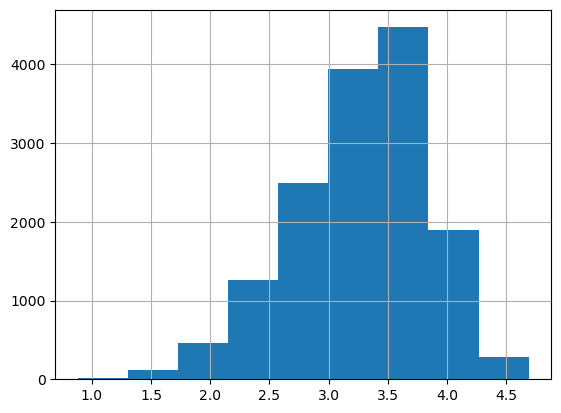

In [5]:
df['Average_rating'].hist(bins=9)

# Identificação de padrões iniciais 

# Perguntas de pesquisa e explorações iniciais:

Com intuito de traçar o perfil cinematográfico dos usuários do Letterbox de Curitiba realizou-se a análise de padrões gerais dentre os usuários da rede. Ainda, realizou-se comparações entre comportamentos locais e globais de usuários do letterbox. Para completar a análise, verificou-se a existência de relações entre premiações e desempenho do filme, a partir de dados externos a rede.

* Um filme com boa avaliação implica em ser mais visualizado ou famoso?
* Qual a relação entre o ano e o total de visualizações da produção? Os filmes mais recentes são mais assistidos?

In [12]:
# Data frame contendo variáveis numéricas de intersse para análise de correlação
df_corr = df[['Curitiba_Average', 'Watches', 'Release_year']]
df_corr.corr()

Curitiba_Average   Watches  Release_year
Curitiba_Average          1.000000  0.126188     -0.154820
Watches                   0.126188  1.000000      0.018306
Release_year             -0.154820  0.018306      1.000000